In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [759]:
df = pd.read_csv('googleplaystore.csv')
df = df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [760]:
df = df.drop(['Size','Last Updated','Current Ver','Android Ver'],axis = 1)
df

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"1,000+",Free,0,Mature 17+,Books & Reference


In [761]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0,Everyone,Art & Design;Creativity


In [762]:
df.shape

(10358, 9)

In [763]:
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [764]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [765]:
Counter(df['Rating'])

Counter({4.1: 657,
         3.9: 372,
         4.7: 484,
         4.5: 977,
         4.3: 1016,
         4.4: 1032,
         3.8: 293,
         4.2: 888,
         4.6: 768,
         3.2: 64,
         4.0: 539,
         nan: 1,
         4.8: 228,
         4.9: 87,
         3.6: 169,
         3.7: 231,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         3.3: 101,
         nan: 1,
         3.4: 127,
         nan: 1,
         3.5: 157,
         nan: 1,
         3.1: 69,
         nan: 1,
         nan: 1,
         5.0: 271,
         2.6: 24,
         nan: 1,
         nan: 1,
         nan: 1,
         3.0: 82,
         1.9: 12,
         2.5: 20,
         2.8: 40,
         nan: 1,
         2.7: 23,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         1.0: 16,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
  

In [766]:
df['Rating'].fillna(df['Rating'].mean(),inplace = True)

In [767]:
Counter(df['Type'])

Counter({'Free': 9591, 'Paid': 765, nan: 1, '0': 1})

In [768]:
null_index = df[df['Type'].isnull()].index.tolist()
null_index

[9148]

In [769]:
df['Type'].fillna('Free',inplace=True)

In [770]:
zero_index = df[df['Type']=='0'].index.tolist()
zero_index

[10472]

In [771]:
df.drop(10472,inplace=True)

In [772]:
Counter(df['Content Rating'])

Counter({'Everyone': 8382,
         'Teen': 1146,
         'Everyone 10+': 377,
         'Mature 17+': 447,
         'Adults only 18+': 3,
         'Unrated': 2})

In [773]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

###  1. What is the download rate by categories?

In [774]:
df1 = df[['Category','Installs']]
df1 = df1.sort_values(by='Category')
df1

,Category,Installs
0,ART_AND_DESIGN,10000
34,ART_AND_DESIGN,10000
35,ART_AND_DESIGN,100000
36,ART_AND_DESIGN,500000
37,ART_AND_DESIGN,5000000
...,...,...
3648,WEATHER,1000000
4962,WEATHER,100000
3649,WEATHER,50000000
3643,WEATHER,1000000


###  2. What is the name of the 15 most downloaded applications?

In [775]:
df2 = df[['App', 'Installs']]
df2

,App,Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000
1,Coloring book moana,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000
3,Sketch - Draw & Paint,50000000
4,Pixel Draw - Number Art Coloring Book,100000
...,...,...
10836,Sya9a Maroc - FR,5000
10837,Fr. Mike Schmitz Audio Teachings,100
10838,Parkinson Exercices FR,1000
10839,The SCP Foundation DB fr nn5n,1000


In [776]:
df2 = df2.sort_values(by='Installs',ascending=False,ignore_index=False)
df2.head(15)

,App,Installs
3255,SHAREit - Transfer & Share,500000000
1885,Pou,500000000
3450,Microsoft Word,500000000
5596,Samsung Health,500000000
1842,Candy Crush Saga,500000000
3703,MX Player,500000000
3711,MX Player,500000000
467,Viber Messenger,500000000
3739,Twitter,500000000
3755,Flipboard: News For Our Time,500000000


In [777]:
df3 = df2['App'].head(15).tolist()
df3

['SHAREit - Transfer & Share',
 'Pou',
 'Microsoft Word',
 'Samsung Health',
 'Candy Crush Saga',
 'MX Player',
 'MX Player',
 'Viber Messenger',
 'Twitter',
 'Flipboard: News For Our Time',
 'Temple Run 2',
 'My Talking Tom',
 'Candy Crush Saga',
 'Pou',
 'UC Browser - Fast Download Private & Secure']

###  3. What is the download rate for paid applications? 

In [778]:
df4 = df[['Installs','Type']][df['Type']=='Paid']
df4

,Installs,Type
234,100000,Paid
235,100000,Paid
427,100000,Paid
476,10000,Paid
477,1000,Paid
...,...,...
10735,100,Paid
10760,1000,Paid
10782,10000,Paid
10785,10000,Paid


In [779]:
df4.sort_values(by='Installs', ascending = False)

,Installs,Type
9785,500000,Paid
6936,500000,Paid
7810,500000,Paid
9478,500000,Paid
853,500000,Paid
...,...,...
9719,0,Paid
4465,0,Paid
9934,0,Paid
9905,0,Paid


### 4. Sort by category.

In [780]:
df5 = df.sort_values(by='Category')
df5

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design
34,I Creative Idea,ART_AND_DESIGN,4.7,353,10000,Free,0,Teen,Art & Design
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,100000,Free,0,Everyone,Art & Design
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,500000,Free,0,Everyone,Art & Design;Creativity
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,5000000,Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
3648,Klart.se - Sweden's best weather,WEATHER,3.6,7623,1000000,Free,0,Everyone,Weather
4962,Weather & Radar Pro - Ad-Free,WEATHER,4.5,25243,100000,Paid,$2.99,Everyone,Weather
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858,50000000,Free,0,Everyone,Weather
3643,Live Weather & Daily Local Weather Forecast,WEATHER,4.5,13426,1000000,Free,0,Everyone,Weather


###  5. What is the download rate and user rating by category?

In [781]:
df7 = df5[['Category','Rating','Installs']]
df7

,Category,Rating,Installs
0,ART_AND_DESIGN,4.1,10000
34,ART_AND_DESIGN,4.7,10000
35,ART_AND_DESIGN,3.8,100000
36,ART_AND_DESIGN,4.7,500000
37,ART_AND_DESIGN,4.1,5000000
...,...,...,...
3648,WEATHER,3.6,1000000
4962,WEATHER,4.5,100000
3649,WEATHER,4.5,50000000
3643,WEATHER,4.5,1000000


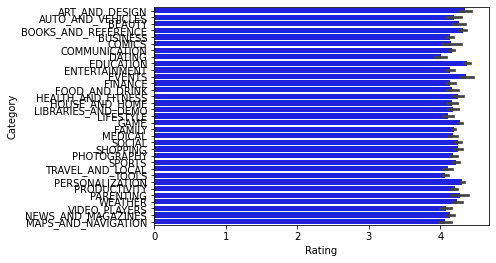

In [782]:
sns.barplot(x="Rating", y="Category", data=df, label="Total", color="b")
plt.savefig('Ratings.png', dpi =400, bbox_inches = 'tight')

###  6. Apply Machine learning models?

In [783]:
df_new = pd.get_dummies(df7.drop(['Category'],axis=1),drop_first=True)

In [784]:
df_new.head()

,Rating,Installs_1,Installs_10,Installs_100,Installs_1000,Installs_10000,Installs_100000,Installs_1000000,Installs_10000000,Installs_100000000,Installs_1000000000,Installs_5,Installs_50,Installs_500,Installs_5000,Installs_50000,Installs_500000,Installs_5000000,Installs_50000000,Installs_500000000
0,4.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,4.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,3.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37,4.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [785]:
X = df_new.drop(['Rating'],axis=1)
y = df_new['Rating']

In [786]:
X.head()

,Installs_1,Installs_10,Installs_100,Installs_1000,Installs_10000,Installs_100000,Installs_1000000,Installs_10000000,Installs_100000000,Installs_1000000000,Installs_5,Installs_50,Installs_500,Installs_5000,Installs_50000,Installs_500000,Installs_5000000,Installs_50000000,Installs_500000000
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [787]:
y.head()

0     4.1
34    4.7
35    3.8
36    4.7
37    4.1
Name: Rating, dtype: float64

In [788]:
from sklearn.model_selection import train_test_split

In [789]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [790]:
X_train.shape

(7767, 19)

In [791]:
X_test.shape

(2590, 19)

In [792]:
from sklearn.preprocessing import StandardScaler

In [793]:
scaler = StandardScaler()

In [794]:
scaler.fit(X)

StandardScaler()

In [795]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [796]:
X_train[:5]

array([[-0.08069186, -0.19648945, -0.27128953, -0.30661176, -0.33285036,
        -0.34977855, -0.40960395, -0.35029991, -0.19220909, -0.06894628,
        -0.08933384, -0.14174831, -0.18084567, -0.21778712, -0.21900033,
         4.36266914, -0.26570964, -0.16422773, -0.07697162],
       [-0.08069186, -0.19648945, -0.27128953, -0.30661176, -0.33285036,
        -0.34977855, -0.40960395,  2.85469671, -0.19220909, -0.06894628,
        -0.08933384, -0.14174831, -0.18084567, -0.21778712, -0.21900033,
        -0.22921747, -0.26570964, -0.16422773, -0.07697162],
       [-0.08069186, -0.19648945, -0.27128953, -0.30661176, -0.33285036,
         2.85895172, -0.40960395, -0.35029991, -0.19220909, -0.06894628,
        -0.08933384, -0.14174831, -0.18084567, -0.21778712, -0.21900033,
        -0.22921747, -0.26570964, -0.16422773, -0.07697162],
       [-0.08069186, -0.19648945, -0.27128953, -0.30661176,  3.00435309,
        -0.34977855, -0.40960395, -0.35029991, -0.19220909, -0.06894628,
        -0.089

In [797]:
from sklearn.linear_model import LinearRegression

In [798]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [799]:
predictions = linreg.predict(X_test)

In [800]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [801]:
metrics.mean_absolute_error(y_test,predictions)

0.30856060768006704

In [802]:
metrics.mean_squared_error(y_test,predictions)

0.22085941771554388

In [803]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.4699568253739314

In [804]:
r2_score(y_test,predictions)

0.04401740325381909

In [805]:
linreg.score(X_test,y_test)

0.04401740325381909